In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# load data 
print("\nload data")
metadata_df = pd.read_csv("metadata.csv")
# show first 5 rows 

metadata_df.head()
# show shape
print("\nshape of data")
metadata_df.shape

# get data types
print("\nData types")
metadata_df.info()





load data


/var/folders/bm/_kj1t3152rz_zd6pf78vd8_h0000gn/T/ipykernel_2853/4178481578.py:3: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv("metadata.csv")



shape of data

Data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    3737

In [15]:
# check on missing data
print("\nMissing data per column:")
print(metadata_df.isnull().sum())

# summary statistics
print("\nSummary statistics:")
print(metadata_df.describe())


Missing data per column:
cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

Summary statistics:
       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


In [16]:
# indetify a nan value in the dataset
print("\nIdentifying NaN values in the dataset:")
nan_values = metadata_df[metadata_df.isna().any(axis=1)]
print(nan_values)
# identify a column with many NaN values
column_with_many_nans = metadata_df.columns[metadata_df.isna().sum() > 10]
print("\nIdentifying columns with more than 10 NaN values:")


def handle_missing(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handles NaN values in metadata_df with column-specific replacements.
    """
    replacements = {
        "title": "No Title",
        "doi": "No DOI",
        "pmcid": "No PMCID",
        "pubmed_id": "No PubMed ID",
        "abstract": "No Abstract",
        "publish_time": "1900-01-01",   # Use a default date
        "authors": "Unknown Authors",
        "journal": "Unknown Journal",
        "who_covidence_id": "No Covidence ID",
        "arxiv_id": "No ArXiv ID",
        "pdf_json_files": "No PDF JSON",
        "pmc_json_files": "No PMC JSON",
        "url": "No URL",
        "sha": "No SHA",
        "mag_id": 0,  
        "s2_id": 0    
    }

    # Apply 
    for col, value in replacements.items():
        if col in df.columns:
            if col == "publish_time":
                df[col] = pd.to_datetime(df[col], errors="coerce").fillna(pd.to_datetime(value))
            else:
                df[col] = df[col].fillna(value)

    return df




Identifying NaN values in the dataset:
         cord_uid                                                sha  \
0        ug7v899j           d1aafb70c066a2068b02786f8929fd9c900897fb   
1        02tnwd4m           6b0567729c2143a66d737eb0a2f63f2dce2e5a7d   
2        ejv2xln0           06ced00a5fc04215949aa72528f2eeaae1d58927   
3        2b73a28n           348055649b6b8cf2b9a376498df9bf41f7123605   
4        9785vg6d           5f48792a5fa08bed9f56016f4981ae2ca6031b32   
...           ...                                                ...   
1056655  aeuy92bx  d86cfba423427426c10fa9092748733f5c7ca7e0; a8e5...   
1056656  n8hlrknq           b98985f125c3391aac709332e6380fe8b11ef6e5   
1056657  05dxn54t           0d1698212a1fcbbed2ffff38953397b3fb82f30d   
1056658  zpeij14g           9b2bbb5ceb21084931b5de7e0d60633e524a20bb   
1056659  pq54lvya           c7ae1a19b70e6e2806b670e4c0f64d3043698ee1   

                       source_x  \
0                           PMC   
1                        

In [17]:
metadata_df = handle_missing(metadata_df)

print(metadata_df.isnull().sum())

cord_uid            0
sha                 0
source_x            0
title               0
doi                 0
pmcid               0
pubmed_id           0
license             0
abstract            0
publish_time        0
authors             0
journal             0
mag_id              0
who_covidence_id    0
arxiv_id            0
pdf_json_files      0
pmc_json_files      0
url                 0
s2_id               0
dtype: int64


In [18]:
# prepare data for analysis
metadata_df = handle_missing(metadata_df)

print(metadata_df.isnull().sum())

cord_uid            0
sha                 0
source_x            0
title               0
doi                 0
pmcid               0
pubmed_id           0
license             0
abstract            0
publish_time        0
authors             0
journal             0
mag_id              0
who_covidence_id    0
arxiv_id            0
pdf_json_files      0
pmc_json_files      0
url                 0
s2_id               0
dtype: int64


In [19]:
# Count papers by publication year
publication_year_counts = metadata_df['publish_time'].dt.year.value_counts().sort_index()
print("\nCount of papers by publication year:")
print(publication_year_counts)


Count of papers by publication year:
publish_time
1856         3
1857         1
1860         2
1864         1
1876         1
         ...  
2020    164751
2021    219516
2022     85310
2023         1
2024         1
Name: count, Length: 75, dtype: int64


In [20]:
# Identify top journals publishing COVID-19 research
top_journals = metadata_df['journal'].value_counts().head(10)
print("\nTop journals publishing COVID-19 research:")
print(top_journals)


Top journals publishing COVID-19 research:
journal
Unknown Journal                    87322
PLoS One                            9953
bioRxiv                             8961
Int J Environ Res Public Health     8201
BMJ                                 6928
Sci Rep                             5935
Cureus                              4212
Reactions Weekly                    3891
Front Psychol                       3541
BMJ Open                            3515
Name: count, dtype: int64


In [21]:
# Find most frequent words in titles (using simple word frequency)
from collections import Counter
import re   
all_titles = ' '.join(metadata_df['title'].tolist()).lower()
words = re.findall(r'\b\w+\b', all_titles)
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
print("\nMost frequent words in titles:")
print(most_common_words)


Most frequent words in titles:
[('of', 719612), ('the', 561666), ('and', 541897), ('in', 529201), ('covid', 494829), ('19', 484493), ('a', 349734), ('for', 207425), ('to', 170467), ('with', 163171)]


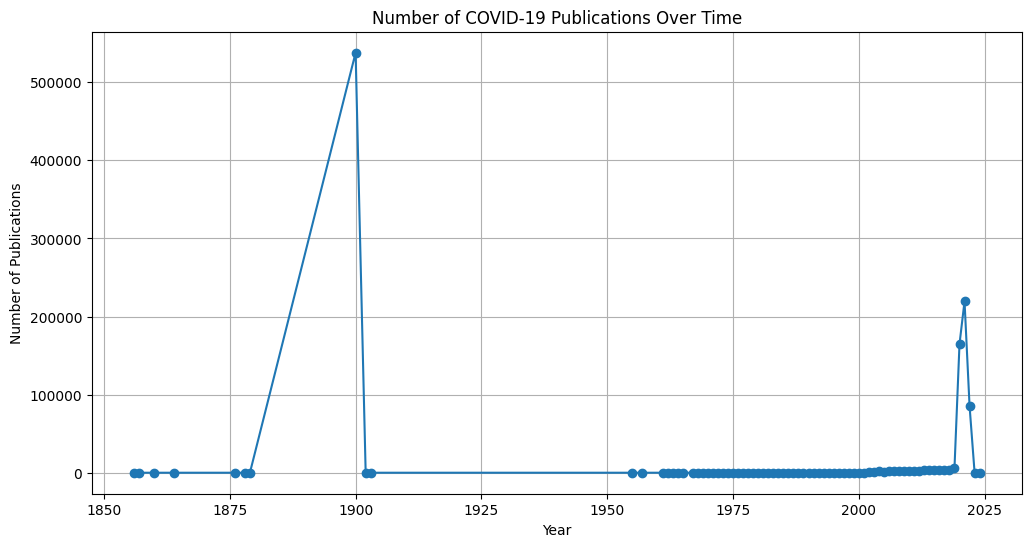

In [22]:
# Plot number of publications over time

plt.figure(figsize=(12, 6))
plt.plot(publication_year_counts.index, publication_year_counts.values, marker='o')
plt.title("Number of COVID-19 Publications Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.grid()
plt.show()

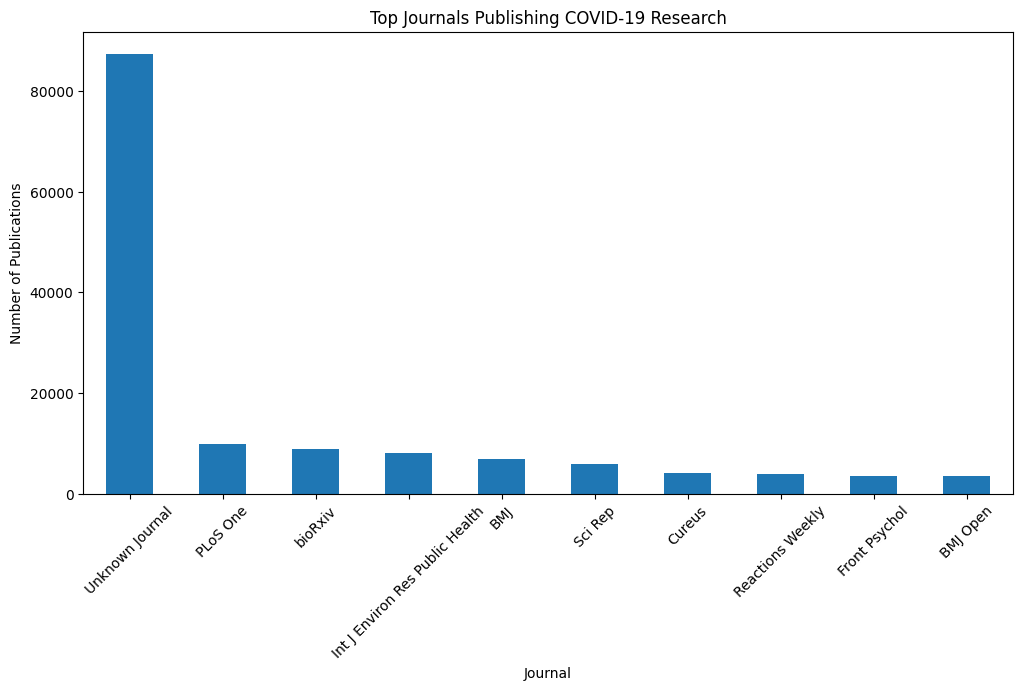

In [23]:
# Create a bar chart of top publishing journals
plt.figure(figsize=(12, 6))
top_journals.plot(kind='bar')
plt.title("Top Journals Publishing COVID-19 Research")
plt.xlabel("Journal")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45)
plt.show()

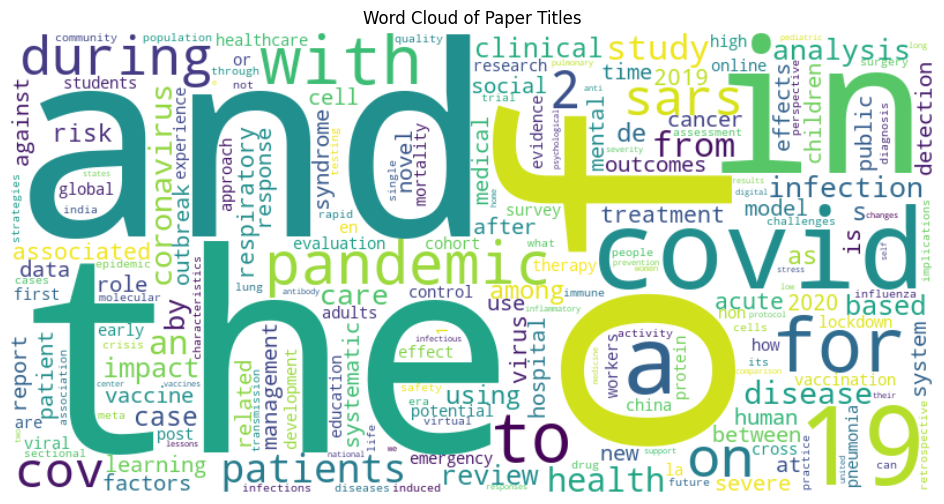

In [24]:
# Generate a word cloud of paper titles visualization
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles")
plt.show()  


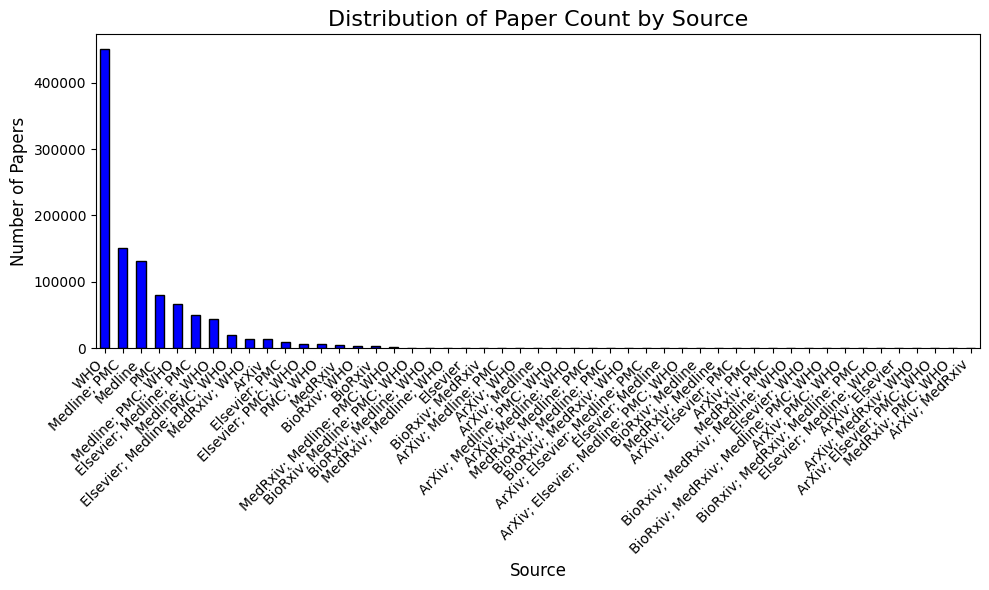

In [25]:
# Plot distribution of paper counts by source

# Count papers by source
source_counts = metadata_df["source_x"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
source_counts.plot(kind="bar", color="blue", edgecolor="black")

plt.title("Distribution of Paper Count by Source", fontsize=16)
plt.xlabel("Source", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()